In [1]:
import qmcpy as qp
from qmcpy.integrand.um_bridge_wrapper import UMBridgeWrapper
import umbridge

# Set up umbridge model and (optional) model config
model = umbridge.HTTPModel("http://localhost:4242", "forward")

d = 2

# Choose a distribution of suitable dimension to sample via QMC
dnb2 = qp.DigitalNetB2(d)
#gauss_sobol = qp.Uniform(dnb2, lower_bound=[3400, 1.0], upper_bound=[3500, 1.1])
gauss_sobol = qp.Uniform(dnb2, lower_bound=[3.4, 1.0], upper_bound=[3.5, 1.2])

# Create integrand based on umbridge model
integrand = UMBridgeWrapper(gauss_sobol, model, parallel=False)

# Run QMC integration to some accuracy and print results
qmc_sobol_algorithm = qp.CubQMCSobolG(integrand, abs_tol=1e10, n_init = 2**8, n_max = 2**8)
solution,data = qmc_sobol_algorithm.integrate()
print(data)
print(solution)

LDTransformData (AccumulateData Object)
    solution        [    0.     1526.963  3016.047 ...     0.    20516.13  -8910.73 ]
    comb_bound_low  [    0.     1526.715  3015.558 ...     0.    20147.134 -9114.242]
    comb_bound_high [    0.     1527.211  3016.535 ...     0.    20885.125 -8707.217]
    comb_flags      [ True  True  True ...  True  True  True]
    n_total         2^(8)
    n               [256. 256. 256. ... 256. 256. 256.]
    time_integrate  6.587
CubQMCSobolG (StoppingCriterion Object)
    abs_tol         10000000000
    rel_tol         0
    n_init          2^(8)
    n_max           2^(8)
UMBridgeWrapper (Integrand Object)
Uniform (TrueMeasure Object)
    lower_bound     [3.4 1. ]
    upper_bound     [3.5 1.2]
DigitalNetB2 (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       LMS_DS
    graycode        0
    entropy         230441780185633764571204803382181605025
    spawn_key       ()
[ 0.00000000e+00  1.52696265e+03  3

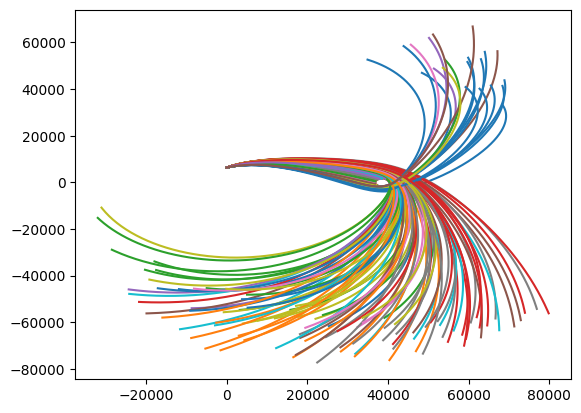

In [2]:
import matplotlib.pyplot as plt

for row in data.yfull:
  plt.plot(row[0:201], row[201:402])
plt.show()